In [6]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [7]:
from datasets import Dataset
import os



In [15]:
# Lade die Arrow-Datei
data = Dataset.from_file("data-00000-of-00001.arrow")

# Zielverzeichnis für CoNLL-Dateien
output_dir = "./data_conll"
os.makedirs(output_dir, exist_ok=True)

tag_mapping = {0: "O", 1: "B-PER", 2: "I-PER", 3: "B-ORG", 4: "I-ORG", 5: "B-LOC", 6: "I-LOC"}

def write_to_conll(data_split, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for example in data_split:
            tokens = example["tokens"]
            tags = [tag_mapping[tag] for tag in example["ner_tags"]]  # Mapping anwenden
            for token, tag in zip(tokens, tags):
                f.write(f"{token} {tag}\n")
            f.write("\n")  # Satztrennung


In [16]:

# Beispiel: Test-Datei einlesen
train_data = Dataset.from_file("data-00000-of-00001.arrow")
write_to_conll(train_data, "./data_conll/test.txt")


In [17]:
# Beispiel: Train-Datei einlesen
validation_data = Dataset.from_file("data-00000-of-00001.arrow")
write_to_conll(validation_data, "./data_conll/train.txt")


In [18]:
# Beispiel: Validation-Datei einlesen
test_data = Dataset.from_file("data-00000-of-00001.arrow")
write_to_conll(test_data, "./data_conll/validation.txt")

In [2]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.5 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=659a49e18e041ba8ceb7bdf1ba87b0ac38ef55b5f88a252205a42c08b7e26ff3
  Stored in directory: /root/.cache/p

In [3]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import WordEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from flair.visual.training_curves import Plotter
import torch

In [4]:
# GPU überprüfen
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU.")

Using GPU: Tesla T4


In [21]:
# 1. Daten einlesen
# Format: "token tag" (z. B. I-PER, O), Spalten durch Leerzeichen getrennt
# Datei-Pfade (passe diese an):
data_folder = "/content/data_conll"
corpus = ColumnCorpus(
    data_folder,
    column_format={0: 'text', 1: 'ner'},
    train_file="train.txt",
    test_file="test.txt",
    dev_file="validation.txt"
)

2025-01-15 15:29:15,505 Reading data from /content/data_conll
2025-01-15 15:29:15,508 Train: /content/data_conll/train.txt
2025-01-15 15:29:15,509 Dev: /content/data_conll/validation.txt
2025-01-15 15:29:15,511 Test: /content/data_conll/test.txt


In [22]:
# 2. Embeddings definieren
# Verwende FastText, GloVe oder eine Kombination
word_embeddings = [
    WordEmbeddings('glove'),       # GloVe-Embeddings
    #WordEmbeddings('en-crawl')    # FastText-Embeddings (alternativ)
]

2025-01-15 15:30:34,442 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpn9dexvy_


100%|██████████| 153M/153M [00:14<00:00, 11.2MB/s]

2025-01-15 15:30:49,172 copying /tmp/tmpn9dexvy_ to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2025-01-15 15:30:49,359 removing temp file /tmp/tmpn9dexvy_
2025-01-15 15:30:49,882 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpfwpmgju_


100%|██████████| 20.5M/20.5M [00:02<00:00, 9.20MB/s]

2025-01-15 15:30:52,704 copying /tmp/tmpfwpmgju_ to cache at /root/.flair/embeddings/glove.gensim
2025-01-15 15:30:52,725 removing temp file /tmp/tmpfwpmgju_


In [24]:
from flair.embeddings import StackedEmbeddings

# Kombiniere die Embeddings (falls mehrere)
embeddings = StackedEmbeddings(word_embeddings)


In [26]:
# 3. SequenceTagger definieren
tagger = SequenceTagger(
    hidden_size=256,              # Anzahl der Hidden Units im LSTM
    embeddings=embeddings,        # Eingangs-Embeddings
    tag_dictionary = corpus.make_label_dictionary(label_type='ner'),
    tag_type='ner',
    use_crf=True                  # CRF-Layer für bessere Sequenzvorhersagen
)


2025-01-15 15:54:21,659 Computing label dictionary. Progress:


0it [00:00, ?it/s]
20000it [00:00, 33070.64it/s]

2025-01-15 15:54:22,277 Dictionary created for label 'ner' with 3 values: ORG (seen 8571 times), PER (seen 7770 times), LOC (seen 7563 times)
2025-01-15 15:54:22,280 SequenceTagger predicts: Dictionary with 13 tags: O, S-ORG, B-ORG, E-ORG, I-ORG, S-PER, B-PER, E-PER, I-PER, S-LOC, B-LOC, E-LOC, I-LOC


In [27]:
# 4. Training
trainer = ModelTrainer(tagger, corpus)

trainer.train(
    base_path='./output',         # Speicherort für Modell und Logs
    learning_rate=0.1,            # Lernrate
    mini_batch_size=32,           # Batch-Größe
    max_epochs=20,                # Maximale Anzahl an Epochen
    embeddings_storage_mode='gpu' if torch.cuda.is_available() else 'cpu'  # Effiziente Speicherung
)


2025-01-15 15:56:06,705 ----------------------------------------------------------------------------------------------------
2025-01-15 15:56:06,707 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=15, bias=True)
  (loss_function): ViterbiLoss()
  (crf): CRF()
)"
2025-01-15 15:56:06,710 ----------------------------------------------------------------------------------------------------
2025-01-15 15:56:06,712 Corpus: 20000 train + 10000 dev + 10000 test sentences
2025-01-15 15:56:06,713 ----------------------------------------------------------------------------------------------------
2025-01-15 15:56:06,715 Train:

/usr/local/lib/python3.10/dist-packages/flair/trainers/trainer.py:545: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=use_amp and flair.device.type != "cpu")


2025-01-15 15:56:10,282 epoch 1 - iter 62/625 - loss 1.59104073 - time (sec): 3.53 - samples/sec: 3310.47 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:12,173 epoch 1 - iter 124/625 - loss 1.29947780 - time (sec): 5.43 - samples/sec: 4328.36 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:13,968 epoch 1 - iter 186/625 - loss 1.14520855 - time (sec): 7.22 - samples/sec: 4893.46 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:15,948 epoch 1 - iter 248/625 - loss 1.05423997 - time (sec): 9.20 - samples/sec: 5107.73 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:18,650 epoch 1 - iter 310/625 - loss 0.98905304 - time (sec): 11.90 - samples/sec: 4931.38 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:20,539 epoch 1 - iter 372/625 - loss 0.93894452 - time (sec): 13.79 - samples/sec: 5133.41 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:22,493 epoch 1 - iter 434/625 - loss 0.90151012 - time (sec): 15.75 - samples/sec: 5250.48 - lr: 0.100000 - momentum: 0.0000

100%|██████████| 157/157 [00:18<00:00,  8.56it/s]

2025-01-15 15:56:47,074 DEV : loss 0.5909384489059448 - f1-score (micro avg)  0.3586


2025-01-15 15:56:47,311  - 0 epochs without improvement
2025-01-15 15:56:47,312 saving best model
2025-01-15 15:56:47,974 ----------------------------------------------------------------------------------------------------
2025-01-15 15:56:49,792 epoch 2 - iter 62/625 - loss 0.61951428 - time (sec): 1.81 - samples/sec: 6490.02 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:52,018 epoch 2 - iter 124/625 - loss 0.62930392 - time (sec): 4.04 - samples/sec: 5952.42 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:53,854 epoch 2 - iter 186/625 - loss 0.61976498 - time (sec): 5.87 - samples/sec: 6134.67 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:56,129 epoch 2 - iter 248/625 - loss 0.61503947 - time (sec): 8.15 - samples/sec: 5888.53 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:56:58,605 epoch 2 - iter 310/625 - loss 0.61252550 - time (sec): 10.62 - samples/sec: 5638.40 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:57:00,377 epoch 2 - iter 372/625 - loss 0.608921

100%|██████████| 157/157 [00:18<00:00,  8.60it/s]

2025-01-15 15:57:26,472 DEV : loss 0.48722437024116516 - f1-score (micro avg)  0.3978


2025-01-15 15:57:26,740  - 0 epochs without improvement
2025-01-15 15:57:26,742 saving best model
2025-01-15 15:57:27,448 ----------------------------------------------------------------------------------------------------
2025-01-15 15:57:29,310 epoch 3 - iter 62/625 - loss 0.57171148 - time (sec): 1.86 - samples/sec: 6319.54 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:57:31,210 epoch 3 - iter 124/625 - loss 0.57106963 - time (sec): 3.76 - samples/sec: 6305.09 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:57:33,045 epoch 3 - iter 186/625 - loss 0.56257959 - time (sec): 5.59 - samples/sec: 6343.57 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:57:35,478 epoch 3 - iter 248/625 - loss 0.56582737 - time (sec): 8.03 - samples/sec: 5923.98 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:57:37,763 epoch 3 - iter 310/625 - loss 0.56560376 - time (sec): 10.31 - samples/sec: 5775.43 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:57:39,546 epoch 3 - iter 372/625 - loss 0.560420

100%|██████████| 157/157 [00:17<00:00,  9.14it/s]

2025-01-15 15:58:04,669 DEV : loss 0.4734741747379303 - f1-score (micro avg)  0.424


2025-01-15 15:58:04,916  - 0 epochs without improvement
2025-01-15 15:58:04,919 saving best model
2025-01-15 15:58:05,682 ----------------------------------------------------------------------------------------------------
2025-01-15 15:58:07,646 epoch 4 - iter 62/625 - loss 0.53463597 - time (sec): 1.96 - samples/sec: 6177.04 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:09,418 epoch 4 - iter 124/625 - loss 0.53871777 - time (sec): 3.73 - samples/sec: 6381.95 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:11,287 epoch 4 - iter 186/625 - loss 0.53563254 - time (sec): 5.60 - samples/sec: 6371.53 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:13,496 epoch 4 - iter 248/625 - loss 0.54249877 - time (sec): 7.81 - samples/sec: 6069.80 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:15,902 epoch 4 - iter 310/625 - loss 0.54134552 - time (sec): 10.22 - samples/sec: 5750.64 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:18,000 epoch 4 - iter 372/625 - loss 0.541987

100%|██████████| 157/157 [00:15<00:00,  9.96it/s]


2025-01-15 15:58:41,671 DEV : loss 0.45587554574012756 - f1-score (micro avg)  0.4504
2025-01-15 15:58:41,911  - 0 epochs without improvement
2025-01-15 15:58:41,913 saving best model
2025-01-15 15:58:42,663 ----------------------------------------------------------------------------------------------------
2025-01-15 15:58:44,611 epoch 5 - iter 62/625 - loss 0.50639822 - time (sec): 1.94 - samples/sec: 6273.30 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:46,462 epoch 5 - iter 124/625 - loss 0.51544510 - time (sec): 3.80 - samples/sec: 6275.25 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:48,610 epoch 5 - iter 186/625 - loss 0.51843257 - time (sec): 5.94 - samples/sec: 5988.07 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:50,530 epoch 5 - iter 248/625 - loss 0.52028030 - time (sec): 7.86 - samples/sec: 5997.79 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:58:52,665 epoch 5 - iter 310/625 - loss 0.51786291 - time (sec): 10.00 - samples/sec: 5915.82 - lr: 0.1000

100%|██████████| 157/157 [00:16<00:00,  9.37it/s]


2025-01-15 15:59:19,920 DEV : loss 0.4410876929759979 - f1-score (micro avg)  0.4648
2025-01-15 15:59:20,280  - 0 epochs without improvement
2025-01-15 15:59:20,282 saving best model
2025-01-15 15:59:21,050 ----------------------------------------------------------------------------------------------------
2025-01-15 15:59:23,180 epoch 6 - iter 62/625 - loss 0.51887205 - time (sec): 2.13 - samples/sec: 5701.01 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:59:25,030 epoch 6 - iter 124/625 - loss 0.50696563 - time (sec): 3.98 - samples/sec: 6003.05 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:59:26,923 epoch 6 - iter 186/625 - loss 0.50701090 - time (sec): 5.87 - samples/sec: 6102.67 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:59:28,898 epoch 6 - iter 248/625 - loss 0.51203476 - time (sec): 7.84 - samples/sec: 6093.60 - lr: 0.100000 - momentum: 0.000000
2025-01-15 15:59:30,983 epoch 6 - iter 310/625 - loss 0.51193764 - time (sec): 9.93 - samples/sec: 5990.91 - lr: 0.100000

100%|██████████| 157/157 [00:16<00:00,  9.77it/s]


2025-01-15 15:59:57,412 DEV : loss 0.4271529018878937 - f1-score (micro avg)  0.475
2025-01-15 15:59:57,792  - 0 epochs without improvement
2025-01-15 15:59:57,797 saving best model
2025-01-15 15:59:58,926 ----------------------------------------------------------------------------------------------------
2025-01-15 16:00:00,782 epoch 7 - iter 62/625 - loss 0.50507920 - time (sec): 1.85 - samples/sec: 6264.47 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:00:02,926 epoch 7 - iter 124/625 - loss 0.51159728 - time (sec): 4.00 - samples/sec: 5894.18 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:00:04,916 epoch 7 - iter 186/625 - loss 0.50846921 - time (sec): 5.99 - samples/sec: 5962.65 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:00:06,816 epoch 7 - iter 248/625 - loss 0.50546642 - time (sec): 7.89 - samples/sec: 6026.61 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:00:08,691 epoch 7 - iter 310/625 - loss 0.50534313 - time (sec): 9.76 - samples/sec: 6065.79 - lr: 0.100000 

100%|██████████| 157/157 [00:15<00:00,  9.88it/s]


2025-01-15 16:00:35,064 DEV : loss 0.420190691947937 - f1-score (micro avg)  0.4752
2025-01-15 16:00:35,425  - 0 epochs without improvement
2025-01-15 16:00:35,429 saving best model
2025-01-15 16:00:36,627 ----------------------------------------------------------------------------------------------------
2025-01-15 16:00:38,853 epoch 8 - iter 62/625 - loss 0.50342722 - time (sec): 2.22 - samples/sec: 5425.66 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:00:40,794 epoch 8 - iter 124/625 - loss 0.50903180 - time (sec): 4.16 - samples/sec: 5729.23 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:00:42,615 epoch 8 - iter 186/625 - loss 0.50078587 - time (sec): 5.98 - samples/sec: 5938.94 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:00:44,685 epoch 8 - iter 248/625 - loss 0.49882699 - time (sec): 8.05 - samples/sec: 5906.12 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:00:46,582 epoch 8 - iter 310/625 - loss 0.49951810 - time (sec): 9.95 - samples/sec: 6003.62 - lr: 0.100000 

100%|██████████| 157/157 [00:15<00:00,  9.86it/s]


2025-01-15 16:01:12,787 DEV : loss 0.44583651423454285 - f1-score (micro avg)  0.4636
2025-01-15 16:01:13,029  - 1 epochs without improvement
2025-01-15 16:01:13,030 ----------------------------------------------------------------------------------------------------
2025-01-15 16:01:16,219 epoch 9 - iter 62/625 - loss 0.47966450 - time (sec): 3.19 - samples/sec: 3898.60 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:01:17,993 epoch 9 - iter 124/625 - loss 0.48754754 - time (sec): 4.96 - samples/sec: 4807.78 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:01:19,817 epoch 9 - iter 186/625 - loss 0.48541148 - time (sec): 6.78 - samples/sec: 5269.55 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:01:21,760 epoch 9 - iter 248/625 - loss 0.48631467 - time (sec): 8.73 - samples/sec: 5451.49 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:01:23,502 epoch 9 - iter 310/625 - loss 0.48606677 - time (sec): 10.47 - samples/sec: 5642.81 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:01:2

100%|██████████| 157/157 [00:16<00:00,  9.75it/s]

2025-01-15 16:01:50,074 DEV : loss 0.41004887223243713 - f1-score (micro avg)  0.4898


2025-01-15 16:01:50,322  - 0 epochs without improvement
2025-01-15 16:01:50,324 saving best model
2025-01-15 16:01:51,073 ----------------------------------------------------------------------------------------------------
2025-01-15 16:01:53,441 epoch 10 - iter 62/625 - loss 0.48113400 - time (sec): 2.36 - samples/sec: 5033.62 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:01:55,823 epoch 10 - iter 124/625 - loss 0.48177176 - time (sec): 4.74 - samples/sec: 5069.01 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:01:57,652 epoch 10 - iter 186/625 - loss 0.48755567 - time (sec): 6.57 - samples/sec: 5443.15 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:01:59,532 epoch 10 - iter 248/625 - loss 0.48639546 - time (sec): 8.45 - samples/sec: 5661.48 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:02:01,401 epoch 10 - iter 310/625 - loss 0.48639959 - time (sec): 10.32 - samples/sec: 5754.56 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:02:03,643 epoch 10 - iter 372/625 - loss 0.

100%|██████████| 157/157 [00:15<00:00,  9.86it/s]

2025-01-15 16:02:28,419 DEV : loss 0.40706175565719604 - f1-score (micro avg)  0.4971


2025-01-15 16:02:28,675  - 0 epochs without improvement
2025-01-15 16:02:28,676 saving best model
2025-01-15 16:02:29,381 ----------------------------------------------------------------------------------------------------
2025-01-15 16:02:31,714 epoch 11 - iter 62/625 - loss 0.45404413 - time (sec): 2.32 - samples/sec: 5091.60 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:02:34,415 epoch 11 - iter 124/625 - loss 0.46519549 - time (sec): 5.03 - samples/sec: 4724.75 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:02:36,259 epoch 11 - iter 186/625 - loss 0.47035745 - time (sec): 6.87 - samples/sec: 5166.03 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:02:38,078 epoch 11 - iter 248/625 - loss 0.47022268 - time (sec): 8.69 - samples/sec: 5467.02 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:02:39,896 epoch 11 - iter 310/625 - loss 0.47291577 - time (sec): 10.51 - samples/sec: 5657.56 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:02:41,680 epoch 11 - iter 372/625 - loss 0.

100%|██████████| 157/157 [00:16<00:00,  9.60it/s]

2025-01-15 16:03:06,898 DEV : loss 0.4111945331096649 - f1-score (micro avg)  0.4967


2025-01-15 16:03:07,139  - 1 epochs without improvement
2025-01-15 16:03:07,140 ----------------------------------------------------------------------------------------------------
2025-01-15 16:03:09,216 epoch 12 - iter 62/625 - loss 0.49141685 - time (sec): 2.07 - samples/sec: 5790.98 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:11,604 epoch 12 - iter 124/625 - loss 0.48715547 - time (sec): 4.46 - samples/sec: 5286.73 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:13,838 epoch 12 - iter 186/625 - loss 0.48343010 - time (sec): 6.70 - samples/sec: 5265.10 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:15,561 epoch 12 - iter 248/625 - loss 0.48067578 - time (sec): 8.42 - samples/sec: 5574.48 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:17,467 epoch 12 - iter 310/625 - loss 0.47531307 - time (sec): 10.32 - samples/sec: 5728.53 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:19,235 epoch 12 - iter 372/625 - loss 0.47410198 - time (sec): 12.09 - samples/sec

100%|██████████| 157/157 [00:16<00:00,  9.68it/s]

2025-01-15 16:03:44,450 DEV : loss 0.40437719225883484 - f1-score (micro avg)  0.492


2025-01-15 16:03:44,776  - 2 epochs without improvement
2025-01-15 16:03:44,777 ----------------------------------------------------------------------------------------------------
2025-01-15 16:03:46,658 epoch 13 - iter 62/625 - loss 0.45910905 - time (sec): 1.88 - samples/sec: 6140.70 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:48,725 epoch 13 - iter 124/625 - loss 0.46336800 - time (sec): 3.94 - samples/sec: 5915.27 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:51,547 epoch 13 - iter 186/625 - loss 0.46781574 - time (sec): 6.77 - samples/sec: 5218.95 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:53,291 epoch 13 - iter 248/625 - loss 0.46440935 - time (sec): 8.51 - samples/sec: 5527.59 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:55,378 epoch 13 - iter 310/625 - loss 0.46907529 - time (sec): 10.60 - samples/sec: 5593.00 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:03:57,175 epoch 13 - iter 372/625 - loss 0.47079906 - time (sec): 12.39 - samples/sec

100%|██████████| 157/157 [00:14<00:00, 10.74it/s]

2025-01-15 16:04:20,518 DEV : loss 0.41096049547195435 - f1-score (micro avg)  0.4926


2025-01-15 16:04:20,770  - 3 epochs without improvement
2025-01-15 16:04:20,772 ----------------------------------------------------------------------------------------------------
2025-01-15 16:04:22,683 epoch 14 - iter 62/625 - loss 0.46416538 - time (sec): 1.91 - samples/sec: 6343.27 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:04:24,487 epoch 14 - iter 124/625 - loss 0.46443340 - time (sec): 3.71 - samples/sec: 6416.97 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:04:26,406 epoch 14 - iter 186/625 - loss 0.46810074 - time (sec): 5.63 - samples/sec: 6392.36 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:04:28,761 epoch 14 - iter 248/625 - loss 0.46782827 - time (sec): 7.99 - samples/sec: 5975.20 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:04:31,406 epoch 14 - iter 310/625 - loss 0.46856936 - time (sec): 10.63 - samples/sec: 5632.60 - lr: 0.100000 - momentum: 0.000000
2025-01-15 16:04:33,324 epoch 14 - iter 372/625 - loss 0.46733992 - time (sec): 12.55 - samples/sec

100%|██████████| 157/157 [00:16<00:00,  9.40it/s]


2025-01-15 16:04:57,833 DEV : loss 0.40268123149871826 - f1-score (micro avg)  0.4939
2025-01-15 16:04:58,074  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.05]
2025-01-15 16:04:58,076 ----------------------------------------------------------------------------------------------------
2025-01-15 16:04:59,924 epoch 15 - iter 62/625 - loss 0.45948631 - time (sec): 1.84 - samples/sec: 6233.28 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:05:01,791 epoch 15 - iter 124/625 - loss 0.45344579 - time (sec): 3.71 - samples/sec: 6355.07 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:05:03,805 epoch 15 - iter 186/625 - loss 0.45324535 - time (sec): 5.73 - samples/sec: 6171.46 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:05:05,883 epoch 15 - iter 248/625 - loss 0.45010945 - time (sec): 7.80 - samples/sec: 6077.80 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:05:08,769 epoch 15 - iter 310/625 - loss 0.44882748 - time (sec): 10.69 - samples/sec: 55

100%|██████████| 157/157 [00:17<00:00,  9.03it/s]


2025-01-15 16:05:35,910 DEV : loss 0.38622841238975525 - f1-score (micro avg)  0.5115
2025-01-15 16:05:36,199  - 0 epochs without improvement
2025-01-15 16:05:36,202 saving best model
2025-01-15 16:05:36,959 ----------------------------------------------------------------------------------------------------
2025-01-15 16:05:39,011 epoch 16 - iter 62/625 - loss 0.42203457 - time (sec): 2.05 - samples/sec: 5984.22 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:05:41,150 epoch 16 - iter 124/625 - loss 0.43606625 - time (sec): 4.19 - samples/sec: 5766.33 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:05:43,011 epoch 16 - iter 186/625 - loss 0.43746460 - time (sec): 6.05 - samples/sec: 5958.64 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:05:44,912 epoch 16 - iter 248/625 - loss 0.43886559 - time (sec): 7.95 - samples/sec: 6035.96 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:05:47,594 epoch 16 - iter 310/625 - loss 0.43969444 - time (sec): 10.63 - samples/sec: 5615.42 - lr: 0

100%|██████████| 157/157 [00:17<00:00,  9.08it/s]


2025-01-15 16:06:14,309 DEV : loss 0.391145259141922 - f1-score (micro avg)  0.5082
2025-01-15 16:06:14,548  - 1 epochs without improvement
2025-01-15 16:06:14,550 ----------------------------------------------------------------------------------------------------
2025-01-15 16:06:16,449 epoch 17 - iter 62/625 - loss 0.44673973 - time (sec): 1.90 - samples/sec: 6296.16 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:06:18,297 epoch 17 - iter 124/625 - loss 0.44519492 - time (sec): 3.74 - samples/sec: 6359.89 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:06:20,079 epoch 17 - iter 186/625 - loss 0.44303448 - time (sec): 5.53 - samples/sec: 6391.37 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:06:22,054 epoch 17 - iter 248/625 - loss 0.44094188 - time (sec): 7.50 - samples/sec: 6299.31 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:06:24,648 epoch 17 - iter 310/625 - loss 0.44276660 - time (sec): 10.10 - samples/sec: 5887.06 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:0

100%|██████████| 157/157 [00:17<00:00,  9.01it/s]

2025-01-15 16:06:52,082 DEV : loss 0.3819618821144104 - f1-score (micro avg)  0.5162


2025-01-15 16:06:52,340  - 0 epochs without improvement
2025-01-15 16:06:52,344 saving best model
2025-01-15 16:06:53,108 ----------------------------------------------------------------------------------------------------
2025-01-15 16:06:54,999 epoch 18 - iter 62/625 - loss 0.42466227 - time (sec): 1.89 - samples/sec: 6298.39 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:06:56,925 epoch 18 - iter 124/625 - loss 0.43014238 - time (sec): 3.81 - samples/sec: 6269.91 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:06:58,998 epoch 18 - iter 186/625 - loss 0.43623027 - time (sec): 5.89 - samples/sec: 6088.11 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:07:00,790 epoch 18 - iter 248/625 - loss 0.43473150 - time (sec): 7.68 - samples/sec: 6186.37 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:07:02,923 epoch 18 - iter 310/625 - loss 0.43545029 - time (sec): 9.81 - samples/sec: 6017.03 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:07:05,485 epoch 18 - iter 372/625 - loss 0.4

100%|██████████| 157/157 [00:17<00:00,  9.06it/s]


2025-01-15 16:07:30,779 DEV : loss 0.37962502241134644 - f1-score (micro avg)  0.5173
2025-01-15 16:07:31,075  - 0 epochs without improvement
2025-01-15 16:07:31,077 saving best model
2025-01-15 16:07:31,850 ----------------------------------------------------------------------------------------------------
2025-01-15 16:07:33,777 epoch 19 - iter 62/625 - loss 0.43170490 - time (sec): 1.92 - samples/sec: 6230.97 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:07:35,710 epoch 19 - iter 124/625 - loss 0.43085669 - time (sec): 3.86 - samples/sec: 6184.98 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:07:37,648 epoch 19 - iter 186/625 - loss 0.43443414 - time (sec): 5.80 - samples/sec: 6129.98 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:07:39,717 epoch 19 - iter 248/625 - loss 0.43548627 - time (sec): 7.86 - samples/sec: 6023.20 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:07:41,896 epoch 19 - iter 310/625 - loss 0.43527609 - time (sec): 10.04 - samples/sec: 5867.75 - lr: 0

100%|██████████| 157/157 [00:17<00:00,  9.09it/s]

2025-01-15 16:08:09,610 DEV : loss 0.3833804726600647 - f1-score (micro avg)  0.5166


2025-01-15 16:08:09,865  - 1 epochs without improvement
2025-01-15 16:08:09,867 ----------------------------------------------------------------------------------------------------
2025-01-15 16:08:11,680 epoch 20 - iter 62/625 - loss 0.42503985 - time (sec): 1.81 - samples/sec: 6500.91 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:08:13,693 epoch 20 - iter 124/625 - loss 0.43571868 - time (sec): 3.82 - samples/sec: 6256.05 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:08:15,692 epoch 20 - iter 186/625 - loss 0.43537718 - time (sec): 5.82 - samples/sec: 6187.00 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:08:17,735 epoch 20 - iter 248/625 - loss 0.43653164 - time (sec): 7.87 - samples/sec: 6091.10 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:08:19,728 epoch 20 - iter 310/625 - loss 0.43701938 - time (sec): 9.86 - samples/sec: 6065.90 - lr: 0.050000 - momentum: 0.000000
2025-01-15 16:08:22,389 epoch 20 - iter 372/625 - loss 0.43433251 - time (sec): 12.52 - samples/sec:

100%|██████████| 157/157 [00:16<00:00,  9.35it/s]


2025-01-15 16:08:46,775 DEV : loss 0.37877851724624634 - f1-score (micro avg)  0.5215
2025-01-15 16:08:47,173  - 0 epochs without improvement
2025-01-15 16:08:47,178 saving best model
2025-01-15 16:08:49,131 ----------------------------------------------------------------------------------------------------
2025-01-15 16:08:49,137 Loading model from best epoch ...
2025-01-15 16:08:49,797 SequenceTagger predicts: Dictionary with 15 tags: O, S-ORG, B-ORG, E-ORG, I-ORG, S-PER, B-PER, E-PER, I-PER, S-LOC, B-LOC, E-LOC, I-LOC, <START>, <STOP>


100%|██████████| 157/157 [00:12<00:00, 12.78it/s]


2025-01-15 16:09:02,319 
Results:
- F-score (micro) 0.5088
- F-score (macro) 0.5078
- Accuracy 0.3551

By class:
              precision    recall  f1-score   support

         PER     0.5392    0.5907    0.5638      3931
         ORG     0.4773    0.3629    0.4123      4321
         LOC     0.5645    0.5311    0.5473      3775

   micro avg     0.5290    0.4901    0.5088     12027
   macro avg     0.5270    0.4949    0.5078     12027
weighted avg     0.5249    0.4901    0.5042     12027

2025-01-15 16:09:02,321 ----------------------------------------------------------------------------------------------------


{'test_score': 0.5088476478204574}

2025-01-15 16:11:58,998 ----------------------------------------------------------------------------------------------------
2025-01-15 16:11:59,000 WARNING: No LOSS found for test split in this data.
2025-01-15 16:11:59,001 Are you sure you want to plot LOSS and not another value?
2025-01-15 16:11:59,002 ----------------------------------------------------------------------------------------------------
2025-01-15 16:11:59,019 ----------------------------------------------------------------------------------------------------
2025-01-15 16:11:59,020 WARNING: No F1 found for test split in this data.
2025-01-15 16:11:59,023 Are you sure you want to plot F1 and not another value?
2025-01-15 16:11:59,024 ----------------------------------------------------------------------------------------------------
2025-01-15 16:12:00,184 Loss and F1 plots are saved in output/training.png


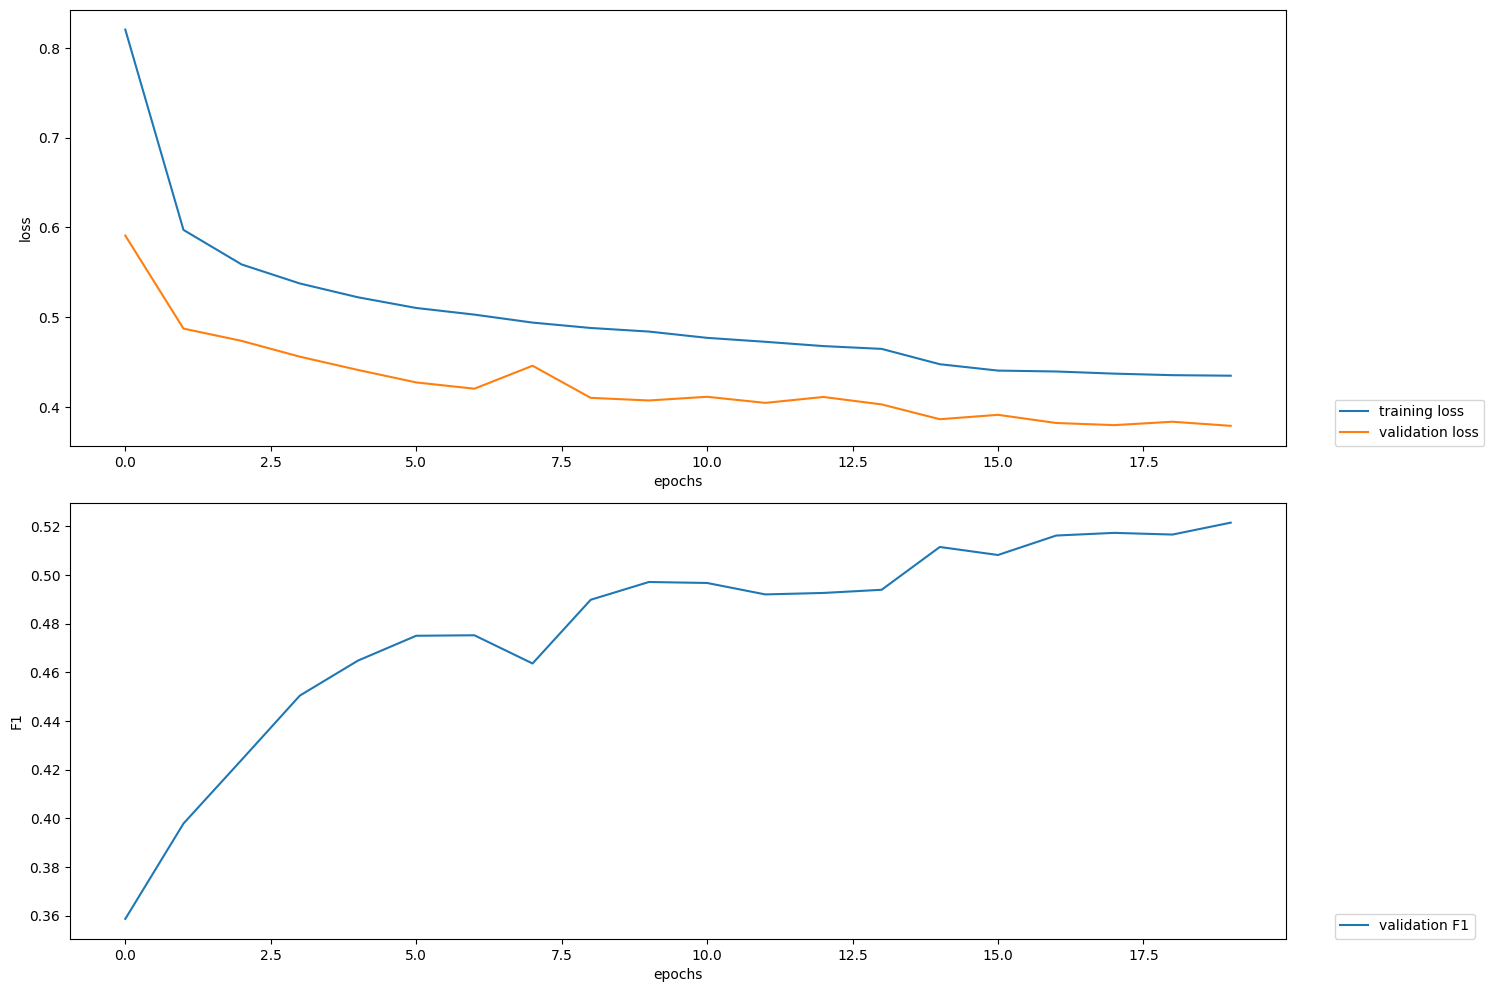

In [29]:
# 5. Visualisierung der Trainingsergebnisse (optional)
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('./output/loss.tsv')  # Verlustkurve ohne Gewichtsdaten


In [33]:
# 6. Evaluierung
evaluation_result = tagger.evaluate(corpus.test, out_path="./output/test_results.txt", gold_label_type='ner')


100%|██████████| 313/313 [00:19<00:00, 16.47it/s]


In [40]:
# Drucke den Klassifikationsbericht
print(evaluation_result.detailed_results)



Results:
- F-score (micro) 0.5088
- F-score (macro) 0.5078
- Accuracy 0.3551

By class:
              precision    recall  f1-score   support

         PER     0.5392    0.5907    0.5638      3931
         ORG     0.4773    0.3629    0.4123      4321
         LOC     0.5645    0.5311    0.5473      3775

   micro avg     0.5290    0.4901    0.5088     12027
   macro avg     0.5270    0.4949    0.5078     12027
weighted avg     0.5249    0.4901    0.5042     12027



In [1]:
!pip install flair

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from flair.models import SequenceTagger

# Pfad zum gespeicherten Modell
model_path = "best-model.pt"

# Modell laden
tagger = SequenceTagger.load(model_path)


2025-01-19 12:35:30,162 SequenceTagger predicts: Dictionary with 15 tags: O, S-ORG, B-ORG, E-ORG, I-ORG, S-PER, B-PER, E-PER, I-PER, S-LOC, B-LOC, E-LOC, I-LOC, <START>, <STOP>


In [3]:
from flair.datasets import ColumnCorpus

# Gib den Pfad zum Verzeichnis mit deinen CoNLL-Dateien an
data_folder = "./Data_en/test_en"  # Das Verzeichnis, das die 'test_de.txt' enthält

# Erstelle den ColumnCorpus, indem du die Testdatei angibst
corpus = ColumnCorpus(data_folder, 
                      column_format={0: 'text', 1: 'ner'},
                      test_file="test_en.txt")

# Nur die ersten 10 Sätze durchlaufen
max_sentences = 10
for i, sentence in enumerate(corpus.test):
    if i >= max_sentences:
        break
    
    # Vorhersagen durchführen
    tagger.predict(sentence)
    
    # Ausgabe des Satzes
    print(sentence)
    
    # Ausgabe der erkannten Entitäten
    for entity in sentence.get_spans('ner'):
        print(f"Entity: {entity.text}, Type: {entity.get_label('ner').value}, Confidence: {entity.score:.4f}")

2025-01-19 12:35:54,993 Reading data from Data_en/test_en
2025-01-19 12:35:54,993 Train: None
2025-01-19 12:35:54,993 Dev: None
2025-01-19 12:35:54,993 Test: Data_en/test_en/test_en.txt
Sentence[17]: "Shortly afterward an encouraging response influenced him to go to India he arrived at Adyar in 1884" → ["India"/LOC, "Adyar"/LOC]
Entity: India, Type: LOC, Confidence: 0.6956
Entity: Adyar, Type: LOC, Confidence: 0.3927
Sentence[8]: "Kanye West featuring Jamie Foxx Gold Digger 2005" → ["Kanye West"/PER, "Jamie Foxx"/PER, "Digger 2005"/PER]
Entity: Kanye West, Type: PER, Confidence: 0.4515
Entity: Jamie Foxx, Type: PER, Confidence: 0.5855
Entity: Digger 2005, Type: PER, Confidence: 0.4727
Sentence[3]: "Blacktown railway station" → ["Blacktown railway station"/ORG]
Entity: Blacktown railway station, Type: ORG, Confidence: 0.6703
Sentence[5]: "Mycalesis perseus lalassis Hewitson 1864" → ["lalassis Hewitson"/LOC]
Entity: lalassis Hewitson, Type: LOC, Confidence: 0.6861
Sentence[5]: "Jonny Lee

In [5]:
import spacy
from spacy import displacy

# Lade das spaCy Modell
nlp = spacy.load("en_core_web_sm")  # Für deutsche Sprache

# Beispieltext
text = "Much construction was undertaken during this period such as the building of Palermo Cathedral"

# Text verarbeiten
doc = nlp(text)

# Visualisierung der Entitäten
displacy.render(doc, style="ent", page=True)